**"A DEEP LEARNING APPROACH TO CAT VS DOG IMAGE CLASSIFICATION"**

IMPORTING THE DATASET FROM THE KAGGLE ACCOUNT TO OUR GOOGLE COLAB

In [158]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [159]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [160]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

IMPORTING THE DESIRED LIBRARIES

In [161]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

**Generators**: are very useful to process large amount of data, provided by Keras.

    image dataset from directory

In [162]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [163]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [164]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [165]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [166]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_24 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_25 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                     

**Compiling the model and then executing it**

In [167]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [168]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 103ms/step - loss: 1.8274 - accuracy: 0.5652 - val_loss: 0.6695 - val_accuracy: 0.6104
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.6428 - accuracy: 0.6306 - val_loss: 0.6201 - val_accuracy: 0.6492
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5465 - accuracy: 0.7201 - val_loss: 0.5312 - val_accuracy: 0.7270
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4920 - accuracy: 0.7649 - val_loss: 0.6375 - val_accuracy: 0.6074
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4188 - accuracy: 0.8093 - val_loss: 0.5511 - val_accuracy: 0.7170
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3588 - accuracy: 0.8429 - val_loss: 0.5065 - val_accuracy: 0.7688
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2822 - accuracy: 0.8842 - val_loss: 0.6933 - val_ac

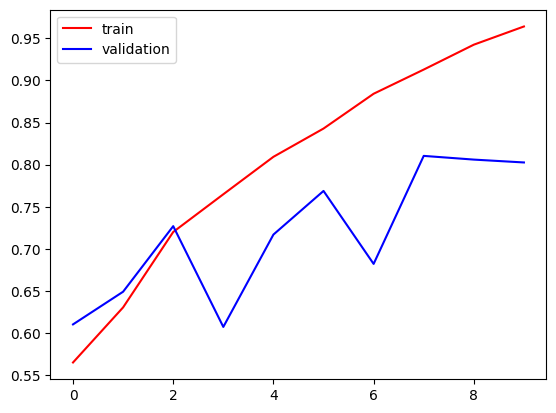

In [169]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

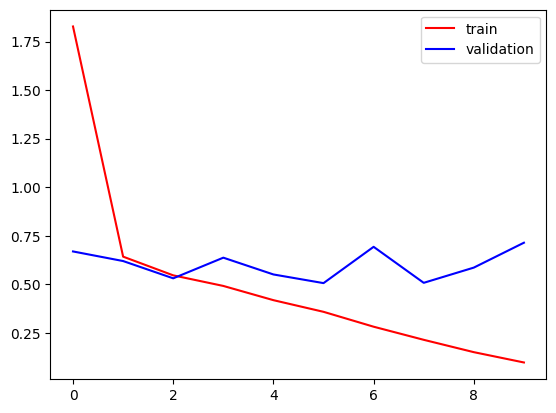

In [170]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**Ways to reduce overfitting**

    # Add more data
    # Data Augmentation : we can create more data by using the existing data
    # L1/L2 Regularizer
    # Dropout
    # Batch Norm(Normalization)
    # Reduce Complexity

In [171]:
import cv2

In [172]:
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10030.jpg')

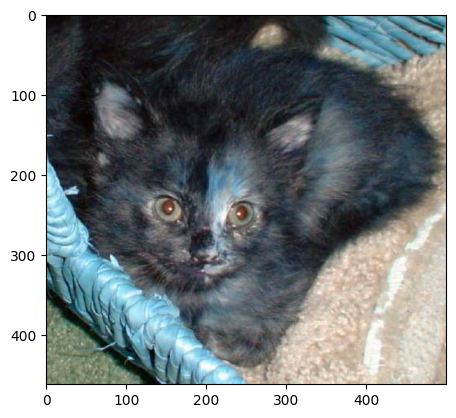

In [173]:
plt.imshow(test_img)

In [174]:
test_img.shape

(462, 500, 3)

In [175]:
test_img = cv2.resize(test_img,(256,256))

In [176]:
test_input = test_img.reshape((1,256,256,3))

In [177]:
model.predict(test_input)

1/1 [==============================] - 0s 132ms/step


array([[0.]], dtype=float32)

In [190]:
test_img_for_dog = cv2.imread('/content/test/dogs/dog.10010.jpg')

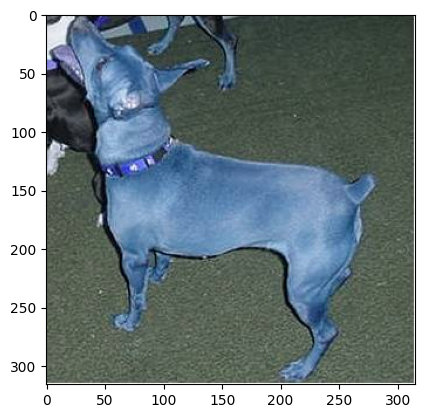

In [191]:
plt.imshow(test_img_for_dog)

In [192]:
test_img_for_dog.shape

(316, 315, 3)

In [193]:
test_img_for_dog = cv2.resize(test_img_for_dog, (256,256))

In [194]:
test_input_for_dog = test_img_for_dog.reshape(1,256,256,3)

In [195]:
model.predict(test_input_for_dog)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)